<a href="https://colab.research.google.com/github/rahuls569/EVA8/blob/main/Assignment6/Assignment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch torchvision
!git clone https://github.com/rahuls569/EVA8 -q --quiet
!mv EVA8/Assignment6/*.py .
!rm -rf EVA8
from __init__ import *
from load_cifar10 import *
from data_loaders import *
from Train_test import *
import torch




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install -U git+https://github.com/albu/albumentations -q --quiet

  Preparing metadata (setup.py) ... done


In [3]:
trainset, testset, classes = load_cifar10('./data', augmentations=augmentations)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [4]:

train_loader, test_loader = setup_dataloaders(trainset, testset, 1)


Image 0: ship
Image 1: bird
Image 2: cat
Image 3: dog
Image 4: bird
Image 5: truck
Image 6: truck
Image 7: plane
Image 8: plane
Image 9: ship
Image 10: truck
Image 11: frog
Image 12: bird
Image 13: bird
Image 14: dog
Image 15: frog
Image 16: ship
Image 17: deer
Image 18: horse
Image 19: truck
Image 20: horse
Image 21: horse
Image 22: dog
Image 23: cat
Image 24: cat
Image 25: truck
Image 26: ship
Image 27: plane
Image 28: car
Image 29: truck
Image 30: frog
Image 31: frog


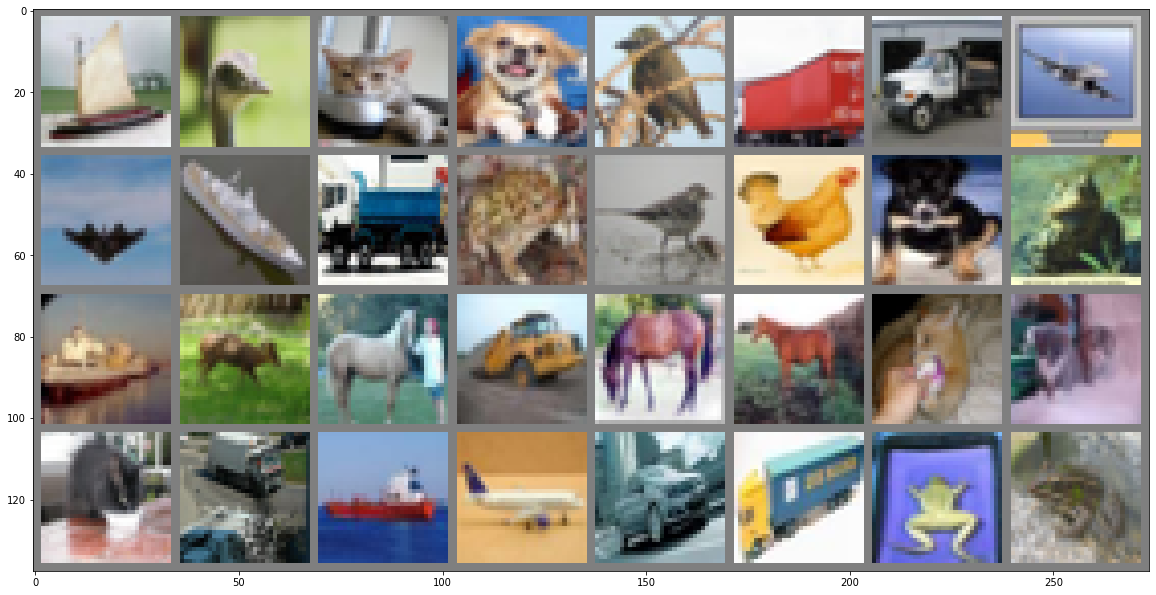

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.figure(figsize=(20,20))  # increase size of plot
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

dataiter = iter(train_loader)
images, labels = next(dataiter)
images = images[:32]  # only display first 20 images
labels = labels[:32]  # only display labels for first 20 images

# display images
imshow(torchvision.utils.make_grid(images))

# print labels
for i in range(32):
    print('Image %d: %s' % (i, classes[labels[i]]))



In [6]:
dataiter = iter(test_loader)
images, labels = next(dataiter)

In [7]:
from Model import *

!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Net().to(device)
summary(model, input_size=(3, 32, 32))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 16, 16]             448
            Conv2d-2             [-1, 32, 8, 8]           4,640
            Conv2d-3             [-1, 32, 4, 4]             320
            Conv2d-4             [-1, 64, 4, 4]           2,112
            Conv2d-5            [-1, 128, 4, 4]          73,856
 AdaptiveAvgPool2d-6            [-1, 128, 1, 1]               0
            Linear-7                   [-1, 10]           1,290
Total params: 82,666
Trainable params: 82,666
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.08
Params size (MB): 0.32
Estimated Total Size (MB): 0.40
----------------------------------------------------------------


In [8]:
#from tqdm import tqdm
from Train_test import *
# train_losses = []
# test_losses = []
# train_acc = []
# test_acc = []

# def train(model, device, train_loader, optimizer, criterion, epoch):
#   model.train()
#   pbar = tqdm(train_loader)
#   correct = 0
#   processed = 0
#   for batch_idx, (data, target) in enumerate(pbar):
#     # get samples
#     data, target = data.to(device), target.to(device)

#     # Init
#     optimizer.zero_grad()
#     # In PyTorch, we need to set the gradients to zero before starting to do backpropragation because PyTorch accumulates the gradients on subsequent backward passes. 
#     # Because of this, when you start your training loop, ideally you should zero out the gradients so that you do the parameter update correctly.

#     # Predict
#     y_pred = model(data)

#     # Calculate loss
#     loss = criterion(y_pred, target)
#     train_losses.append(loss.item())
#     # if(t=='BN'):
#     #   l1=0
#     #   for p in model.parameters():
#     #     l1=l1+p.abs().sum()
#     #     loss= loss+ lamda_l1* l1         

#     # Backpropagation
#     loss.backward()
#     optimizer.step()

#     # Update pbar-tqdm
    
#     pred = y_pred.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
#     correct += pred.eq(target.view_as(pred)).sum().item()
#     processed += len(data)

#     pbar.set_description(desc= f'Loss={loss.item()} Batch_id={batch_idx} Accuracy={100*correct/processed:0.2f}')
#     train_acc.append(100*correct/processed)

# def test(model, device, test_loader, criterion):
#     model.eval()
#     test_loss = 0
#     correct = 0
#    # misclassified_images = []
#     with torch.no_grad():
#         for data, target in test_loader:
#             data, target = data.to(device), target.to(device)
#             output = model(data)
#             test_loss += criterion(output, target).item()  # sum up batch loss
#             pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            
#                         # compare predictions with true label
#              for i, (p, t) in enumerate(zip(pred, target)):
#                 if p != t:
#                     misclassified_images.append((data[i], p, t))
            
            
#             correct += pred.eq(target.view_as(pred)).sum().item()

#     test_loss /= len(test_loader.dataset)
#     test_losses.append(test_loss)

#     print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
#         test_loss, correct, len(test_loader.dataset),
#         100. * correct / len(test_loader.dataset)))
    
#     test_acc.append(100. * correct / len(test_loader.dataset))
#     return misclassified_images

In [9]:

import torch.optim as optim
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.optim.lr_scheduler import StepLR
Trainer1= Trainer()
tester  = Test()
model =  Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.02, momentum=0.9)
scheduler = StepLR(optimizer, step_size=6, gamma=0.1)
criterion = nn.CrossEntropyLoss()

EPOCHS = 25
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    Trainer1.train(model, device, train_loader, optimizer, criterion, epoch)
    scheduler.step()
    tester.test(model, device, test_loader, criterion)

EPOCH: 0


Loss=2.1536524295806885 Batch_id=390 Accuracy=12.22: 100%|██████████| 391/391 [00:13<00:00, 29.35it/s]



Test set: Average loss: 0.0167, Accuracy: 2007/10000 (20.07%)

EPOCH: 1


Loss=1.6432708501815796 Batch_id=390 Accuracy=25.50: 100%|██████████| 391/391 [00:20<00:00, 18.62it/s]



Test set: Average loss: 0.0147, Accuracy: 3004/10000 (30.04%)

EPOCH: 2


Loss=1.6514465808868408 Batch_id=390 Accuracy=33.81: 100%|██████████| 391/391 [00:12<00:00, 30.49it/s]



Test set: Average loss: 0.0131, Accuracy: 3891/10000 (38.91%)

EPOCH: 3


Loss=1.5912857055664062 Batch_id=390 Accuracy=38.73: 100%|██████████| 391/391 [00:12<00:00, 30.76it/s]



Test set: Average loss: 0.0131, Accuracy: 3981/10000 (39.81%)

EPOCH: 4


Loss=1.5982099771499634 Batch_id=390 Accuracy=42.03: 100%|██████████| 391/391 [00:12<00:00, 30.37it/s]



Test set: Average loss: 0.0119, Accuracy: 4363/10000 (43.63%)

EPOCH: 5


Loss=1.4570631980895996 Batch_id=390 Accuracy=44.60: 100%|██████████| 391/391 [00:12<00:00, 30.09it/s]



Test set: Average loss: 0.0116, Accuracy: 4573/10000 (45.73%)

EPOCH: 6


Loss=1.5265867710113525 Batch_id=390 Accuracy=48.28: 100%|██████████| 391/391 [00:12<00:00, 30.15it/s]



Test set: Average loss: 0.0111, Accuracy: 4847/10000 (48.47%)

EPOCH: 7


Loss=1.3426824808120728 Batch_id=390 Accuracy=48.70: 100%|██████████| 391/391 [00:13<00:00, 28.40it/s]



Test set: Average loss: 0.0110, Accuracy: 4884/10000 (48.84%)

EPOCH: 8


Loss=1.3750479221343994 Batch_id=390 Accuracy=48.99: 100%|██████████| 391/391 [00:12<00:00, 30.16it/s]



Test set: Average loss: 0.0110, Accuracy: 4935/10000 (49.35%)

EPOCH: 9


Loss=1.2958134412765503 Batch_id=390 Accuracy=49.51: 100%|██████████| 391/391 [00:13<00:00, 29.40it/s]



Test set: Average loss: 0.0110, Accuracy: 4950/10000 (49.50%)

EPOCH: 10


Loss=1.2513818740844727 Batch_id=390 Accuracy=49.68: 100%|██████████| 391/391 [00:13<00:00, 28.34it/s]



Test set: Average loss: 0.0109, Accuracy: 4945/10000 (49.45%)

EPOCH: 11


Loss=1.431261658668518 Batch_id=390 Accuracy=49.90: 100%|██████████| 391/391 [00:13<00:00, 28.37it/s]



Test set: Average loss: 0.0109, Accuracy: 4967/10000 (49.67%)

EPOCH: 12


Loss=1.4345617294311523 Batch_id=390 Accuracy=50.39: 100%|██████████| 391/391 [00:13<00:00, 28.56it/s]



Test set: Average loss: 0.0108, Accuracy: 4990/10000 (49.90%)

EPOCH: 13


Loss=1.4503543376922607 Batch_id=390 Accuracy=50.56: 100%|██████████| 391/391 [00:13<00:00, 28.69it/s]



Test set: Average loss: 0.0108, Accuracy: 5012/10000 (50.12%)

EPOCH: 14


Loss=1.23600172996521 Batch_id=390 Accuracy=50.57: 100%|██████████| 391/391 [00:13<00:00, 28.60it/s]



Test set: Average loss: 0.0107, Accuracy: 5011/10000 (50.11%)

EPOCH: 15


Loss=1.4274652004241943 Batch_id=390 Accuracy=50.64: 100%|██████████| 391/391 [00:14<00:00, 27.66it/s]



Test set: Average loss: 0.0108, Accuracy: 5019/10000 (50.19%)

EPOCH: 16


Loss=1.3835796117782593 Batch_id=390 Accuracy=50.70: 100%|██████████| 391/391 [00:14<00:00, 27.68it/s]



Test set: Average loss: 0.0108, Accuracy: 5016/10000 (50.16%)

EPOCH: 17


Loss=1.4479032754898071 Batch_id=390 Accuracy=50.56: 100%|██████████| 391/391 [00:13<00:00, 28.16it/s]



Test set: Average loss: 0.0107, Accuracy: 5027/10000 (50.27%)

EPOCH: 18


Loss=1.3205052614212036 Batch_id=390 Accuracy=50.82: 100%|██████████| 391/391 [00:13<00:00, 28.50it/s]



Test set: Average loss: 0.0108, Accuracy: 5024/10000 (50.24%)

EPOCH: 19


Loss=1.3291043043136597 Batch_id=390 Accuracy=50.80: 100%|██████████| 391/391 [00:13<00:00, 28.89it/s]



Test set: Average loss: 0.0108, Accuracy: 5028/10000 (50.28%)

EPOCH: 20


Loss=1.3442044258117676 Batch_id=390 Accuracy=50.79: 100%|██████████| 391/391 [00:14<00:00, 27.82it/s]



Test set: Average loss: 0.0108, Accuracy: 5023/10000 (50.23%)

EPOCH: 21


Loss=1.361838936805725 Batch_id=390 Accuracy=50.79: 100%|██████████| 391/391 [00:14<00:00, 27.54it/s]



Test set: Average loss: 0.0107, Accuracy: 5026/10000 (50.26%)

EPOCH: 22


Loss=1.2654082775115967 Batch_id=390 Accuracy=50.80: 100%|██████████| 391/391 [00:14<00:00, 26.88it/s]



Test set: Average loss: 0.0108, Accuracy: 5023/10000 (50.23%)

EPOCH: 23


Loss=1.4321197271347046 Batch_id=390 Accuracy=50.75: 100%|██████████| 391/391 [00:14<00:00, 26.67it/s]



Test set: Average loss: 0.0108, Accuracy: 5017/10000 (50.17%)

EPOCH: 24


Loss=1.2190752029418945 Batch_id=390 Accuracy=50.77: 100%|██████████| 391/391 [00:13<00:00, 28.42it/s]



Test set: Average loss: 0.0107, Accuracy: 5020/10000 (50.20%)



# New Section